In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
drift_track_metadata_url = 'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/MunroeMetadata.csv'
drift_track_metadata = pd.read_csv(drift_track_metadata_url)
drift_track_metadata.head()

,BeaconID,IMEI,ArgosID,WMO,DataOwner,DataSharingRestrictions,Contact,BeaconType,Manufacturer,Transmitter,...,RelatedBeaconIDs,AdditionalDatasets,Project,Photos_Y_N,NumberPhotos,PhotoCredits,PhotoRestrictions,PhotoComments,PhotoNames,Comments
0,204980,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"906790, 2790480, 2792490","sail/keel mapping with laser and multibeam, CT...",Statoil/ArcticNet Research Cruise 2015,Y,7,"Derek Mueller, Anna Crawford",4,NaN,"204980_2015_approaching the saddle berg 1.JPG,...",Beacon deployed during ArcticNet/Statoil/WIRL ...
1,505190,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"907780, 2791420","photogrammetry, laser scanning",Statoil/ArcticNet Research Cruise 2015,Y,10,"Derek Mueller, Anna Crawford",4,NaN,"505190_2015_Approaching tabular berg.JPG, 5051...",Beacon deployed during ArcticNet/Statoil/WIRL ...
2,906790,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"204980, 2790480, 2792490","sail/keel mapping with laser and multibeam, CT...",Statoil/ArcticNet Research Cruise 2015,Y,See 204980,See 204980,4,NaN,see 204980,Beacon deployed during ArcticNet/Statoil/WIRL ...
3,907780,300000000000000,NaN,NaN,"Water and Ice Research Laboratory, Carleton Un...",1,Derek Mueller,FT-2000,Solara,Iridium,...,"505190, 2791420","photogrammetry, laser scanning",Statoil/ArcticNet Research Cruise 2015,Y,See 505190,See 505190,4,NaN,see 505190,Beacon deployed during ArcticNet/Statoil/WIRL ...


In [35]:
def get_drift_track_df(beacon_id):
    
    url = f'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/0{beacon_id}_2015.csv'
    
    return pd.read_csv(url, parse_dates=['DataDate_UTC'])

beacon_id_list = list(drift_track_metadata['BeaconID'].values)

drift_track_df_by_beacon_id = {}

for beacon_id in beacon_id_list:
    
    drift_track_df_by_beacon_id[f'{beacon_id}'] = get_drift_track_df(beacon_id)

In [36]:
df_dict = drift_track_df_by_beacon_id

In [37]:
df_dict['204980'].head()

,BeaconID,BeaconType,DataDate_UTC,TransmissionDate_UTC,Latitude,Longitude,VBatt,AT,ST,BP,Heading,Speed,LocAccuracy,MessageIndex,Satellites,GPSdelay,SNR,TTFF
0,204980,Solara,2015-04-24 15:16:06,NaN,51.45991,-51.55144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204980,Solara,2015-04-24 15:16:40,NaN,51.45991,-51.55163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204980,Solara,2015-04-24 15:17:14,NaN,51.45993,-51.55161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204980,Solara,2015-04-24 15:17:48,NaN,51.45980,-51.55176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204980,Solara,2015-04-24 15:18:14,NaN,51.46008,-51.55156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_204980 = df_dict['204980']

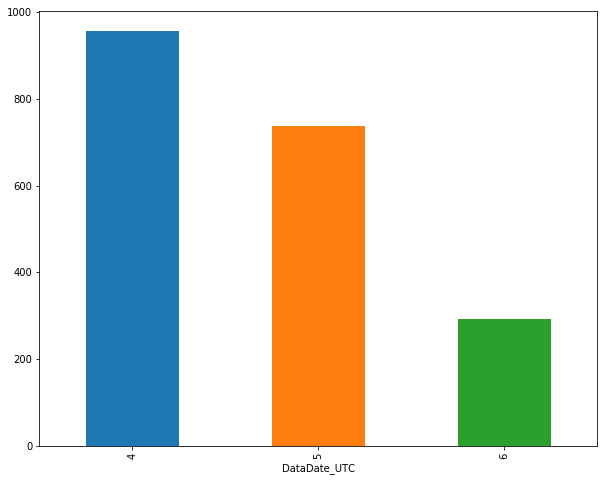

In [46]:
plt.figure(figsize=(10, 8))
df_204980['DataDate_UTC'].groupby(df_204980['DataDate_UTC'].dt.month).count().plot(kind="bar")
plt.show()

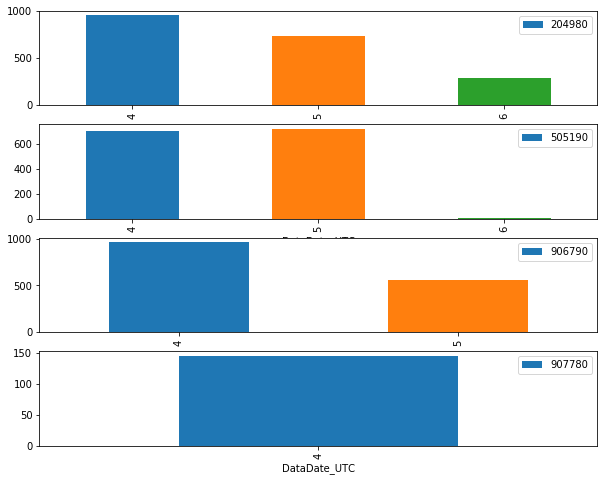

In [60]:
plt.figure(figsize=(10, 8))
i = 1
for key, df in df_dict.items():
    num_dfs = len(df_dict.keys())
    plt.subplot(num_dfs, 1, i)
    df['DataDate_UTC'].groupby(df['DataDate_UTC'].dt.month).count().plot(kind="bar", label=key)
    plt.legend()
    i += 1
plt.show()

In [39]:
df_204980['DataDate_UTC'][0]

Timestamp('2015-04-24 15:16:06')